In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import matplotlib as mpl
import matplotlib.ticker as ticker
from highlight_text import fig_text

In [41]:
base_url="https://understat.com/match/"

In [42]:
match_id=input("enter match id: ")
main_url=base_url+match_id
main_url
res=requests.get(main_url)
soup1=BeautifulSoup(res.content,"lxml")
scripts1=soup1.find_all("script")
strings1=scripts1[1].string
strings1

enter match id: 22132


"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22562562\\x22,\\x22minute\\x22\\x3A\\x2219\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.875\\x22,\\x22Y\\x22\\x3A\\x220.41400001525878904\\x22,\\x22xG\\x22\\x3A\\x220.06439626216888428\\x22,\\x22player\\x22\\x3A\\x22Richarlison\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x226026\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2222132\\x22,\\x22h_team\\x22\\x3A\\x22Tottenham\\x22,\\x22a_team\\x22\\x3A\\x22Brighton\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222024\\x2D02\\x2D10\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22None\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22562563\\x22,\\x22minute\\x22\\x3A\\x2221\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\

In [43]:
start_ind1=strings1.index("('")+2
end_ind1=strings1.index("')")
json_data = strings1[start_ind1:end_ind1]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [44]:
h_data=pd.DataFrame(data["h"])
a_data=pd.DataFrame(data["a"])
final_shot=pd.concat([h_data,a_data])

In [45]:
final_shot

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,562562,19,BlockedShot,0.875,0.41400001525878904,0.06439626216888428,Richarlison,h,6026,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,None
1,562563,21,SavedShot,0.904000015258789,0.665,0.274502158164978,Richarlison,h,6026,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,James Maddison,Throughball
2,562564,21,MissedShots,0.8069999694824219,0.7269999694824218,0.022017378360033035,Timo Werner,h,65,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,Rebound
3,562565,25,MissedShots,0.84,0.625,0.054790787398815155,James Maddison,h,6818,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Richarlison,Pass
4,562568,35,MissedShots,0.9280000305175782,0.59,0.08805003017187119,Richarlison,h,6026,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Timo Werner,Cross
5,562569,37,SavedShot,0.9130000305175782,0.3970000076293945,0.3645493686199188,Dejan Kulusevski,h,6691,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Richarlison,Pass
6,562570,40,BlockedShot,0.8490000152587891,0.3870000076293945,0.0915173664689064,Richarlison,h,6026,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,James Maddison,TakeOn
7,562571,45,BlockedShot,0.769000015258789,0.34599998474121096,0.020896457135677338,Rodrigo Bentancur,h,6108,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Dejan Kulusevski,Pass
8,562572,47,SavedShot,0.7619999694824219,0.3559999847412109,0.05837944895029068,James Maddison,h,6818,DirectFreekick,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,Standard
9,562573,52,BlockedShot,0.7880000305175782,0.5409999847412109,0.03540848568081856,Timo Werner,h,65,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Micky van de Ven,Pass


In [46]:
def covert(s):
    s=s.apply(lambda x:float(x))
    return s

In [47]:
# covert string to numeric
final_shot["minute"]=covert(final_shot["minute"])
final_shot["X"]=covert(final_shot["X"])

final_shot["Y"]=covert(final_shot["Y"])
final_shot["xG"]=covert(final_shot["xG"])


In [48]:
# convert x& y coordinate(80,120)
final_shot["X"]=(final_shot["X"]*120)

final_shot["Y"]=(final_shot["Y"]*80)

In [49]:
final_shot

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,562562,19.0,BlockedShot,105.000000,33.120001,0.064396,Richarlison,h,6026,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,None
1,562563,21.0,SavedShot,108.480002,53.200000,0.274502,Richarlison,h,6026,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,James Maddison,Throughball
2,562564,21.0,MissedShots,96.839996,58.159998,0.022017,Timo Werner,h,65,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,Rebound
3,562565,25.0,MissedShots,100.800000,50.000000,0.054791,James Maddison,h,6818,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Richarlison,Pass
4,562568,35.0,MissedShots,111.360004,47.200000,0.088050,Richarlison,h,6026,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Timo Werner,Cross
5,562569,37.0,SavedShot,109.560004,31.760001,0.364549,Dejan Kulusevski,h,6691,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Richarlison,Pass
6,562570,40.0,BlockedShot,101.880002,30.960001,0.091517,Richarlison,h,6026,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,James Maddison,TakeOn
7,562571,45.0,BlockedShot,92.280002,27.679999,0.020896,Rodrigo Bentancur,h,6108,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Dejan Kulusevski,Pass
8,562572,47.0,SavedShot,91.439996,28.479999,0.058379,James Maddison,h,6818,DirectFreekick,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,Standard
9,562573,52.0,BlockedShot,94.560004,43.279999,0.035408,Timo Werner,h,65,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Micky van de Ven,Pass


In [50]:
goal_cheal=final_shot[(final_shot["h_a"]=="a")&(final_shot["result"]=="Goal")].copy()
nongoal_cheal=final_shot[(final_shot["h_a"]=="a")&(final_shot["result"]!="Goal")].copy()

In [51]:
goal_cry=final_shot[(final_shot["h_a"]=="h")&(final_shot["result"]=="Goal")].copy()
nongoal_cry=final_shot[(final_shot["h_a"]=="h")&(final_shot["result"]!="Goal")].copy()

In [52]:
goal_cry

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
12,562576,60.0,Goal,117.360004,29.439999,0.311121,Pape Sarr,h,9021,OpenPlay,2023,LeftFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,None,None
15,562581,95.0,Goal,114.000000,35.439999,0.566844,Brennan Johnson,h,10760,OpenPlay,2023,RightFoot,22132,Tottenham,Brighton,2,1,2024-02-10 15:00:00,Son Heung-Min,Pass


In [53]:
def team_stat(df,team):
    total_shots=df[df["h_a"]==team]["result"].count()
    total_xg=df[df["h_a"]==team]["xG"].sum()
    total_xg=round(total_xg,2)
    total_goal=df[(df["h_a"]==team)&(df["result"]=="Goal")]["result"].count()
    
    per_shots_xg=total_xg/total_shots
    per_shots_xg=round(per_shots_xg,3)
    
    return total_shots,total_xg,per_shots_xg,total_goal
    
    

In [54]:
a,b,c,d=team_stat(final_shot,"h")

In [55]:
e,f,g,h=team_stat(final_shot,"a")

In [56]:
team1=final_shot["h_team"].iloc[0]
team2=final_shot["a_team"].iloc[0]



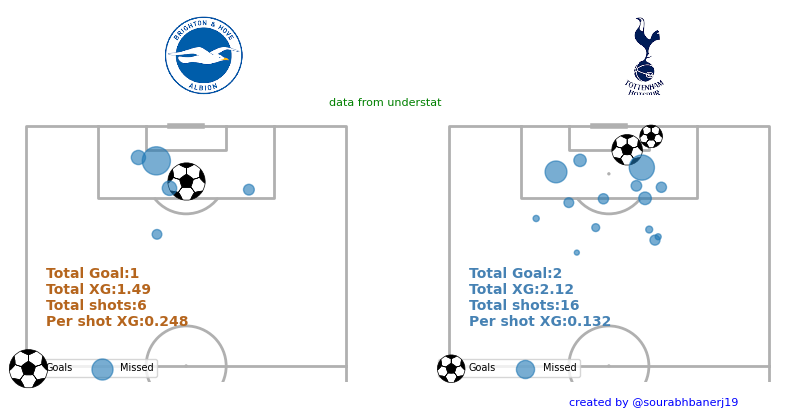

In [57]:
#pitch 
fig,ax=plt.subplots(1,2,figsize=(10,8))
pitch=VerticalPitch(pitch_type="statsbomb",half=True)
pitch.draw(ax=ax[0])
pitch.draw(ax=ax[1])
ax[0].invert_xaxis()
ax[1].invert_xaxis()


goal=pitch.scatter(goal_cheal["X"],goal_cheal["Y"],marker='football',ax=ax[0],s=(goal_cheal["xG"]*1000),label="Goals")
nonal_goal=pitch.scatter(nongoal_cheal["X"],nongoal_cheal["Y"],marker='o',ax=ax[0],s=(nongoal_cheal["xG"]*1000),alpha=.6,label="Missed")
goal=pitch.scatter(goal_cry["X"],goal_cry["Y"],marker='football',ax=ax[1],s=(goal_cry["xG"]*900),label="Goals")
nonal_goal=pitch.scatter(nongoal_cry["X"],nongoal_cry["Y"],marker='o',ax=ax[1],s=(nongoal_cry["xG"]*900),alpha=.6,label="Missed")
legend1=ax[0].legend(loc="lower left",ncol=2,fontsize=7)
legend1=ax[1].legend(loc="lower left",ncol=2,fontsize=7)

plt.text(s="data from understat",x=110,y=125,size=8,color="green")
ax[1].text(s="created by @sourabhbanerj19",x=50,y=50,size=8,color="blUE")
ax[1].text(s=f"Total Goal:{d}\nTotal XG:{b}\nTotal shots:{a}\nPer shot XG:{c}",x=75,y=70,color="#4682B4",weight="bold")
ax[0].text(s=f"Total Goal:{h}\nTotal XG:{f}\nTotal shots:{e}\nPer shot XG:{g}",x=75,y=70,color="#B5651D",weight="bold")
image_path = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\tottenham.png' # Replace 'path_to_your_image.png' with the path to your image
image = plt.imread(image_path)
offset_image = OffsetImage(image, zoom=0.3)
image = plt.imread(image_path)
ab = AnnotationBbox(offset_image, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.6,1.20))
ax[1].add_artist(ab)
image_path1 = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\brighton.png' # Replace 'path_to_your_image.png' with the path to your image
image1 = plt.imread(image_path1)
offset_image1 = OffsetImage(image1, zoom=0.3)
image1 = plt.imread(image_path1)
ab1 = AnnotationBbox(offset_image1, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.55,1.20))
ax[0].add_artist(ab1)




In [58]:
final_shot["minute"]=final_shot["minute"].astype("int64")

In [59]:
#copy the goal data
goal_h=final_shot[(final_shot["h_a"]=="Tottenham")&(final_shot["result"]=="Goal")].copy()
goal_a=final_shot[(final_shot["h_a"]=="Brighton")&(final_shot["result"]=="Goal")].copy()

In [60]:

#using mapping function
a={"h":"Tottenham","a":"Brighton"}
final_shot["h_a"]=final_shot["h_a"].map(a)


In [61]:
h_XG=[]
a_XG=[]
h_min=[]
a_min=[]
h_team=final_shot["h_a"].iloc[0]
a_team=final_shot["h_a"].iloc[-1]
for x in range(len(final_shot["xG"])):
    if final_shot["h_a"].iloc[x]==h_team:
        h_XG.append(final_shot["xG"].iloc[x])
        h_min.append(final_shot["minute"].iloc[x])
        
    elif final_shot["h_a"].iloc[x]==a_team:
        a_XG.append(final_shot["xG"].iloc[x])
        a_min.append(final_shot["minute"].iloc[x])
    else:
        pass

       

In [62]:
def num_cumulative_sum(nums_list):
    return [(sum(nums_list[:i+1])) for i in range(len(nums_list))]
h_cumulative=num_cumulative_sum(h_XG)
a_cumulative=num_cumulative_sum(a_XG)

In [63]:
h_cumulative

[0.06439626216888428,
 0.3388984203338623,
 0.36091579869389534,
 0.4157065860927105,
 0.5037566162645817,
 0.8683059848845005,
 0.9598233513534069,
 0.9807198084890842,
 1.039099257439375,
 1.0745077431201935,
 1.0891519179567695,
 1.149374789558351,
 1.4604953592643142,
 1.5207152729853988,
 1.5484783118590713,
 2.115321940742433]

In [64]:
a_min

[0, 16, 28, 28, 75, 77]

In [65]:
a_cumulative

[0.059902697801589966,
 0.8210715353488922,
 0.8694397062063217,
 0.9743176624178886,
 1.3851335868239403,
 1.4928486198186874]

In [66]:
#round the figure
a_total=round(a_cumulative[-1],2)
h_total=round(h_cumulative[-1],2)

In [67]:
h_df=final_shot[final_shot["h_a"]==h_team]
h_df.sort_values(by="minute",inplace=True)
h_df["h_cum"]=h_df["xG"].cumsum()


C:\Users\welcome\AppData\Local\Temp\ipykernel_10548\385129974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df.sort_values(by="minute",inplace=True)
C:\Users\welcome\AppData\Local\Temp\ipykernel_10548\385129974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df["h_cum"]=h_df["xG"].cumsum()


In [68]:
a_df=final_shot[final_shot["h_a"]==a_team]
a_df.sort_values(by="minute",inplace=True)
a_df["a_cum"]=a_df["xG"].cumsum()

C:\Users\welcome\AppData\Local\Temp\ipykernel_10548\287676455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.sort_values(by="minute",inplace=True)
C:\Users\welcome\AppData\Local\Temp\ipykernel_10548\287676455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df["a_cum"]=a_df["xG"].cumsum()


In [69]:
h_goal = h_df[h_df['result'].str.contains("Goal")]
a_goal = a_df[a_df['result'].str.contains("Goal")]

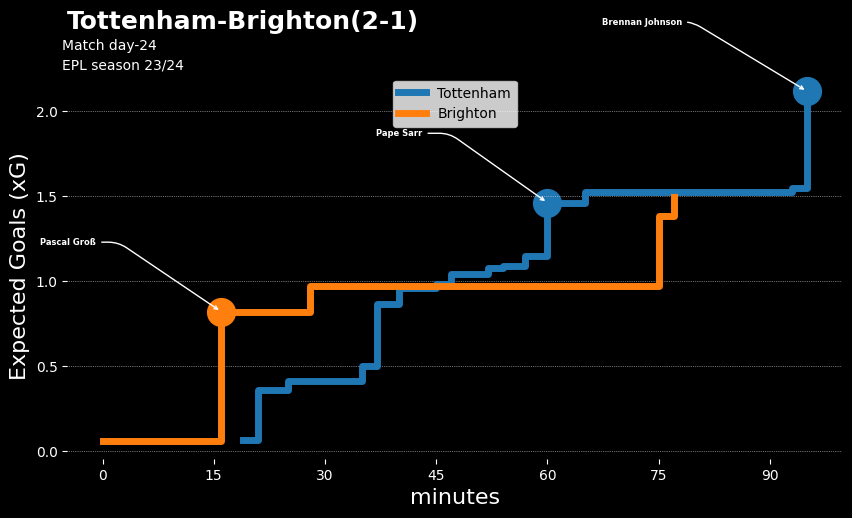

In [71]:
fig,ax=plt.subplots(figsize=(10,5))
fig.set_facecolor("black")
ax.patch.set_facecolor("black")
ax.step(x=h_min,y=h_cumulative,where="post",zorder=5,label="Tottenham",lw=5)
ax.step(x=a_min,y=a_cumulative,where="post",zorder=5,label="Brighton",lw=5)
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,.5,1,1.5,2,2.5])
plt.xlabel("minutes",color='white',fontsize=16)
plt.ylabel("Expected Goals (xG)",color='white',fontsize=16)
ax.legend(loc='upper center')
ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
ax.scatter(x=h_goal["minute"],y=h_goal["h_cum"],marker="o",s=400)
ax.scatter(x=a_goal["minute"],y=a_goal["a_cum"],marker="o",s=400)
fig.text(s=f"{h_team}-{a_team}(2-1)", x=0.125, y=0.97, fontsize=18,fontweight="bold",color="white")
#for home team
for index,row in h_goal.iterrows():
    ax.annotate(row.player,xy=(row.minute,row.h_cum),c="white",ha="right",va="center",size=6,weight='bold',xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10",color="white"))
#for away team
for index,row in a_goal.iterrows():
    ax.annotate(row.player,xy=(row.minute,row.a_cum),c="white",ha="right",va="center",size=6,weight='bold',xytext=(-90, 50),textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10",color="white"))
fig_text(
     x = 0.12, y = .95,
    s = "Match day-24\nEPL season 23/24",
     
    color = "white",
    size =10,
    annotationbbox_kw={"xycoords": "figure fraction"})

    